In [1]:
from functions import *

In [45]:
###########################################

traj_dir = '/mnt/a/MD_Trajectories/PtCO/NPs/continued/cubo_309/'
traj_name = "Pt309_cuboct_623K_4.all.bin"

#p_name = "Pt309_cuboct_498K"
#input_dir = "/mnt/a/MD_Trajectories/PtCO/NPs/Inputs/"
#input_dir = "/mnt/sdcc/sdcc+u/nmarcella/MD_EXAFS_inputs/231228/"


###########################################
traj_path = traj_dir + traj_name

pipeline = import_file(traj_path)

test_pl = MD_EXAFS_Analysis_Pipeline_PtCO(pipeline, file_params={"framerange": range(0,pipeline.source.num_frames,100),"atoms":{"Pt":1, "C":2, "O":3}, "cutoff":3}, custom_analysis_func=find_adsorbed_CO)
#test_pl = MD_EXAFS_Binary_Pipeline_General(pipeline, file_params={"framerange": range(15999,16000),"atoms":{"Pt":1}, "cutoff":3})
test_pl.run()

data = test_pl.data
n_atoms = test_pl.n_atoms_list

In [46]:
n_atoms = np.array(n_atoms)
n_co = np.mean(n_atoms[:,1])

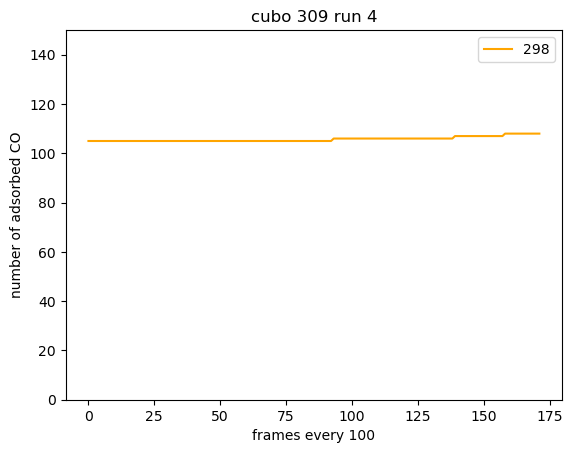

In [47]:
colors = {"148":"blue", "298":"orange","398":"green", "498":"red", "623":"purple"}
#for i in ["148", "298", "398", "498", "623"]:

plt.plot(n_atoms[:,1], label="298", color=colors["298"])
plt.title("cubo 309 run 4")
plt.ylabel("number of adsorbed CO")
plt.xlabel("frames every 100")
plt.ylim(0,150)
plt.legend()

In [49]:
n_frames = len(data)

new_array_top = []
new_array_bridge = []
new_array_multi = []

for frame_data in data:

    results = classify_and_find_distances_array(frame_data)

    top_co = results[np.where(results[:, 1] == 1)[0]]
    bridge_co = results[np.where(results[:, 1] == 2)[0]]
    multi_co = results[np.where(results[:, 1] > 2)[0]]

    
    n_top = top_co.shape[0]
    mean_top = np.mean(top_co[:,2])
    std_top = np.std(top_co[:,2])

    new_array_top.append([n_top, mean_top, std_top])

    n_bridge = bridge_co.shape[0]
    mean_bridge = np.mean(bridge_co[:,2])
    std_bridge = np.std(bridge_co[:,2])

    new_array_bridge.append([n_bridge, mean_bridge, std_bridge])

    if len(multi_co)>0:
        n_multi = multi_co.shape[0]
        mean_multi = np.mean(multi_co[:,2])
        std_multi = np.std(multi_co[:,2])

        new_array_multi.append([n_multi, mean_multi, std_multi])
    else:
        new_array_multi.append([0, 0, 0])

new_array_top = np.array(new_array_top)
new_array_bridge = np.array(new_array_bridge)
new_array_multi = np.array(new_array_multi)


In [39]:
np.mean(new_array_top[:,1])

1.1647807269248687

In [50]:
np.mean(new_array_top[:,1])

1.166213731454234

In [40]:
np.mean(new_array_bridge[:,1])

1.1838731748521656

In [51]:
np.mean(new_array_bridge[:,1])

1.1776503206790627

In [44]:
np.mean(new_array_multi[:,1][new_array_multi[:,1]>1])

1.186435846479575

In [52]:
np.mean(new_array_multi[:,1][new_array_multi[:,1]>1])

1.190153196303171